    # 1.RBF is used for ANN

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.metrics import accuracy_score
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
# from sklearn.preprocessing import PolynomialFeatures

In [2]:
X,y= make_moons(n_samples=500,noise=0.2,random_state=60)
# train and test the data
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=60)


In [3]:
# Standardize_feature #preprocessing
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)


In [4]:
# craete &train the RBF NN
rbf_model=make_pipeline(PolynomialFeatures(degree=2),
                       KernelRidge(kernel="rbf",gamma=1))

In [5]:
# X_test

In [6]:
rbf_model.fit(X_train,y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('kernelridge', KernelRidge(gamma=1, kernel='rbf'))])

In [7]:
# predict and accuracy
y_pred=rbf_model.predict(X_test)
y_pred_binary=np.round(y_pred)
accuracy=accuracy_score(y_test,y_pred_binary)
print("test accuracy:",accuracy)

test accuracy: 0.96


In [8]:
# decision boundry plot
def plot_decision_boundary(model,X,y):
    x_min,x_max=X[:,0].min()-1,X[:,0].max()+1
    y_min,y_max=X[:,0].min()-1,X[:,0].max()+1
    xx,yy=np.meshgrid(np.arange(x_min,x_max,0.01),
                     np.arange(y_min,y_max,0.01))
    z=model.predict(np.c_[xx.ravel(),yy.ravel()])
    z_round=np.round(z).reshape(xx.shape)
    plt.contourf(xx,yy,z_round,alpha=0.8)
    plt.scatter(X[:,0],X[:,1],c=y,marker="o",edgecolors="k")
    plt.title("RBF NN")
    plt.show()

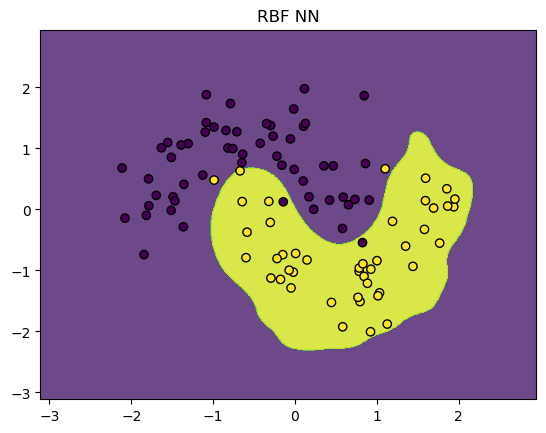

In [9]:
plot_decision_boundary(rbf_model,X_test,y_test)

 2.RBF

In [10]:
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans 
from sklearn.metrics import accuracy_score 
from sklearn.model_selection import train_test_split

In [11]:
# Generate dummy data 
np.random.seed(0) 
X = np.random.rand(1000, 2) 
y = np.where(np.sum(X, axis=1) > 1, 1, 0)

In [12]:
# Split the data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
# RBF Network Class 
class RBFNetwork: 
    def __init__(self, num_centers, sigma=1.0): 
        self.num_centers = num_centers 
        self.sigma = sigma 
        self.centers = None 
        self.weights = None
    def _rbf(self, x, center): 
        return np.exp(-np.linalg.norm(x-center)**2 / (2 * self.sigma**2))
    def _calculate_activations(self, X): 
        G = np.zeros((X.shape[0], self.num_centers)) 
        for ci, c in enumerate(self.centers): 
            for xi, x in enumerate(X): 
                G[xi, ci] = self._rbf(x, c) 
        return G
    def fit(self, X, y): 
        # Choose centers using KMeans 
        kmeans = KMeans(n_clusters=self.num_centers, random_state=0).fit(X) 
        self.centers = kmeans.cluster_centers_ 
             # Calculate activations 
        G = self._calculate_activations(X)  
 
        # Calculate weights using the pseudoinverse 
        self.weights=np.dot(np.linalg.pinv(G),y)
    def predict(self, X): 
        G = self._calculate_activations(X) 
        predictions = np.dot(G, self.weights) 
        return np.round(predictions).astype(int)


In [14]:
# Create and train the RBF Network 
rbf_net = RBFNetwork(num_centers=10, sigma=1.0) 
rbf_net.fit(X_train, y_train) 
 
# Make predictions 
y_train_pred = rbf_net.predict(X_train) 
y_test_pred = rbf_net.predict(X_test) 
 
# Evaluate the model 
train_acc = accuracy_score(y_train, y_train_pred) 
test_acc = accuracy_score(y_test, y_test_pred) 
print(f"Train accuracy: {train_acc:.4f}") 
print(f"Test accuracy: {test_acc:.4f}")

C:\Users\sivau\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Train accuracy: 0.9925
Test accuracy: 0.9850


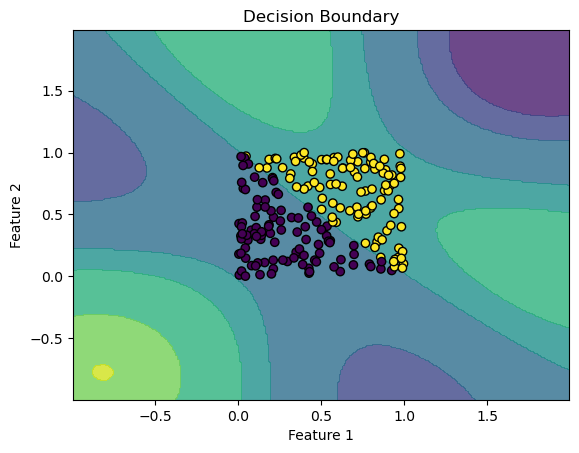

In [15]:
# Plotting the decision boundary 
def plot_decision_boundary(model, X, y): 
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1 
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1 
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), 
                         np.arange(y_min, y_max, 0.01)) 
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]) 
    Z = Z.reshape(xx.shape) 
    plt.contourf(xx, yy, Z, alpha=0.8) 
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o') 
    plt.xlabel('Feature 1') 
    plt.ylabel('Feature 2') 
    plt.title('Decision Boundary') 
    plt.show() 
 
#  plt the decision boundary 
plot_decision_boundary(rbf_net, X_test, y_test)